In [206]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [207]:
df = pd.read_excel('processed_data.xlsx')

# **Total crimes geral**

In [208]:
numeric_df_total = df.select_dtypes(include=np.number)
numeric_df_total = numeric_df_total.sum().sort_values(ascending=False)[2:]
numeric_df_total


,0
Furto - Outros,26060
Lesão Corporal Dolosa,11322
Total De Roubo - Outros,6893
Roubo - Outros,6401
Lesão Corporal Culposa Por Acidente De Trânsito,4936
Furto De Veículo,4130
Roubo De Veículo,1724
Total De Estupro,1195
Estupro De Vulnerável,961
Roubo De Carga,492


In [209]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df = numeric_df.sum().sort_values(ascending=False)[2:12]
numeric_df.sum()

np.int64(64114)

In [210]:
round((numeric_df.sum() * 100/numeric_df_total.sum()), 2)

np.float64(98.29)

In [211]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df = numeric_df.sum().sort_values(ascending=False)[2:7]
round((numeric_df.sum() * 100/numeric_df_total.sum()), 2)

np.float64(85.26)

## **Conclusão**

Ao somarmos os 10 tipos de crimes com maior ocorrência nos 3 municípios, vemos que os mesmos representam cerca de 98,31% do total de 23 tipos de crimes, enquanto o os 5 com maior índice de ocorrência, aproximadamente 85%.

# **Crimes com maior ocorrência por município**

In [212]:
df_grouped = df.groupby(by=['Municipio']).agg(
    {
        'Total': 'sum',
        'Furto - Outros': 'sum',
        'Lesão Corporal Dolosa': 'sum',
        'Total De Roubo - Outros': 'sum',
        'Roubo - Outros': 'sum',
        'Lesão Corporal Culposa Por Acidente De Trânsito': 'sum'

    }
)


In [213]:
def create_pct_col(column_name):
  name = f'{column_name} %'
  df_grouped[name] = (df_grouped[column_name]/df_grouped[column_name].sum())*100
  return df_grouped[name].values

def sum_pct_col(column_to_sum, column_name):
  column_name = column_name + column_to_sum
  return column_name

In [214]:
column_values = pd.Series([0, 0, 0])
for i in df_grouped.columns:
  col = create_pct_col(i)
  column_values = sum_pct_col(column_name=column_values, column_to_sum=col)

df_grouped

,Total,Furto - Outros,Lesão Corporal Dolosa,Total De Roubo - Outros,Roubo - Outros,Lesão Corporal Culposa Por Acidente De Trânsito,Total %,Furto - Outros %,Lesão Corporal Dolosa %,Total De Roubo - Outros %,Roubo - Outros %,Lesão Corporal Culposa Por Acidente De Trânsito %
Municipio,,,,,,,,,,,,
Barueri,41023,16066,5938,4894,4597,3327,62.889775,61.650038,52.446564,70.999565,71.816904,67.402755
Cajamar,11958,5442,2177,1088,954,634,18.332056,20.882579,19.228052,15.784129,14.903921,12.844408
Santana de Parnaíba,12249,4552,3207,911,850,975,18.778170,17.467383,28.325384,13.216306,13.279175,19.752836


In [215]:
for value, munic in zip(column_values, df_grouped.index):
  print(f'{munic}: {round(value/6, 2)}%')

Barueri: 64.53%
Cajamar: 17.0%
Santana de Parnaíba: 18.47%


## **Conclusão**

Barueri responde por 65% dos roubos registrados na região analisada, enquanto, tanto Santana de Parnaíba quanto Cajamar possuem cerca de  18%, sugerindo uma concentração geográfica.

Anomalia em Lesão Corporal Dolosa: Santana de Parnaíba apresenta 28,5% dos casos, valor desproporcional à sua população.

# Cálculo taxa de criminalidade por município

Como os dados apresentaram, Barueri é o município com maior quantidade de crimes cometidos entre os três estudados. Resta estudarmos qual possui a maior taxa de crimes por pesssoa.

Para isso, usaremos dados do IBGE do último censo (e renomearemos os arquivos .xlsx para o formato município.xlsx).

links:
Barueri: https://www.ibge.gov.br/cidades-e-estados/sp/barueri.html

Cajamar: https://www.ibge.gov.br/cidades-e-estados/sp/cajamar.html

Santana de Parnaíba: https://www.ibge.gov.br/cidades-e-estados/sp/santana-de-parnaiba.html

In [216]:
df_municipios = pd.DataFrame()
for city, doc in zip(df.Municipio.unique(), ['barueri.xlsx', 'cajamar.xlsx', 'santana.xlsx']):
  df_pop = pd.read_excel(doc, header=1)
  pop = df_pop.iloc[5].values[1]
  pop = pop.split(' ')[0].replace('.', '')
  new_df = pd.DataFrame([[city, pop]])
  df_municipios = pd.concat([df_municipios, new_df])

df_municipios



,0,1
0,Barueri,330339
0,Cajamar,97363
0,Santana de Parnaíba,162341


In [217]:
sub_df_grouped = df_grouped.Total
df_municipios = df_municipios.merge(sub_df_grouped, left_on=0, right_on='Municipio')

In [218]:
df_municipios[1] = df_municipios[1].astype(int)
df_municipios['multiplicador'] = 100000/df_municipios[1]
df_municipios['total_por_100k'] = round(df_municipios['multiplicador'] * df_municipios['Total'])
df_municipios

,0,1,Total,multiplicador,total_por_100k
0,Barueri,330339,41023,0.302719,12418.0
1,Cajamar,97363,11958,1.027084,12282.0
2,Santana de Parnaíba,162341,12249,0.615987,7545.0


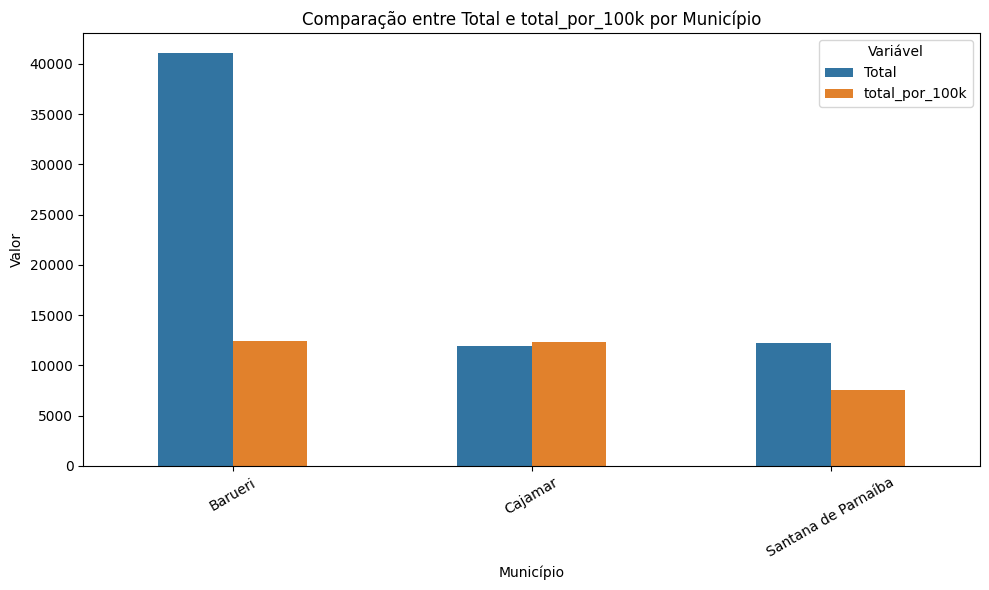

In [219]:

df_long = df_municipios.melt(id_vars=0, value_vars=['Total', 'total_por_100k'],
                  var_name='Variável', value_name='Valor')

# Criar gráfico de barras
plt.figure(figsize=(10, 6))
sns.barplot(data=df_long, x=0, y='Valor', hue='Variável', width=0.5)

plt.title('Comparação entre Total de Crimes e total_por_100k por Município')
plt.xlabel('Município')
plt.ylabel('Valor')
plt.xticks(rotation=30)
plt.tight_layout()
plt.show()


## Conclusão

RASCUNHO: a gnt percebe que, proporcionalmente, santana (com exceção da little farm, aquela faixa de gaza do krl) é o lugar que menos tem crime. Cajamar tem mt pobre aí é paia.